In [143]:
import pandas as pd
import numpy as np
import matplotlib as mp

#Source of data: https://stats.app.covid19.nhs.uk/

In [144]:
df = pd.read_csv("Data/covid19_app_country_specific_dataset.csv")
df.columns

Index(['Week starting (Wythnos yn dechrau)',
       'Week ending (Wythnos yn gorffen)', 'Country (Wlad)',
       'Check-ins (Cofrestriadau)',
       'Symptoms reported (Symptomau a adroddwyd)',
       'Positive test results linked to app (Canlyniadau prawf positif)',
       'Negative test results linked to app (Canlyniadau prawf negatif)',
       'Contact tracing alert (Hysbysiadau olrhain cyswllt)',
       'Cumulative check-ins (Cofrestriadau cronnus)',
       'Cumulative symptoms reported (Symptomau a adroddwyd cronnus)',
       'Cumulative positive test results linked to app (Canlyniadau prawf positif cronnus)',
       'Cumulative negative test results linked to app (Canlyniadau prawf negatif cronnus)',
       'Cumulative contact tracing alert (Hysbysiadau olrhain cyswllt cronnus)'],
      dtype='object')

In [145]:
## Clean the headers
df.columns = df.columns.str.split("(").str[0].str.strip()
df 

,Week starting,Week ending,Country,Check-ins,Symptoms reported,Positive test results linked to app,Negative test results linked to app,Contact tracing alert,Cumulative check-ins,Cumulative symptoms reported,Cumulative positive test results linked to app,Cumulative negative test results linked to app,Cumulative contact tracing alert
0,2020-09-24,2020-09-30,England / Lloegr,9260223.0,113335,9505,27814,3662,9260223,113335,9505,27814,3662
1,2020-09-24,2020-09-30,Wales / Cymru,247989.0,6870,386,4794,108,247989,6870,386,4794,108
2,2020-10-01,2020-10-07,England / Lloegr,11312764.0,89415,20686,88951,19182,20572987,202750,30191,116765,22844
3,2020-10-01,2020-10-07,Wales / Cymru,255741.0,4992,742,5158,535,503730,11862,1128,9952,643
4,2020-10-08,2020-10-14,England / Lloegr,13363491.0,85067,22657,93106,26882,33936478,287817,52848,209871,49726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2022-03-24,2022-03-30,Wales / Cymru,NaN,1020,15399,894,24457,5079651,123056,316532,498946,601608
158,2022-03-31,2022-04-06,England / Lloegr,NaN,12319,160558,8167,371848,256294165,2264054,6126946,8756418,15755672
159,2022-03-31,2022-04-06,Wales / Cymru,NaN,921,11800,474,19437,5079651,123977,328332,499420,621045
160,2022-04-07,2022-04-13,England / Lloegr,NaN,9502,99910,2375,236640,256294165,2273556,6226856,8758793,15992312


In [146]:
#Remove the Welsh translation from Country values
df['Country'] = df['Country'].str.split("/").str[0]


In [147]:
df['Country'].value_counts()

England     81
Wales       81
Name: Country, dtype: int64

In [148]:
pd.pivot_table(df,index=["Country"],values=["Check-ins"],aggfunc=np.sum)

,Check-ins
Country,
England,256294165.0
Wales,5079651.0


In [149]:
df[['Symptoms reported','Contact tracing alert','Positive test results linked to app','Check-ins']].corr()

,Symptoms reported,Contact tracing alert,Positive test results linked to app,Check-ins
Symptoms reported,1.000000,0.195968,0.200041,0.455609
Contact tracing alert,0.195968,1.000000,0.881195,0.159293
Positive test results linked to app,0.200041,0.881195,1.000000,0.005133
Check-ins,0.455609,0.159293,0.005133,1.000000


In [150]:
df['year'] = pd.DatetimeIndex(df['Week starting']).year

In [151]:
country_pivot = df.pivot(index="Week starting", columns="Country",values="Check-ins")

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Week starting'>

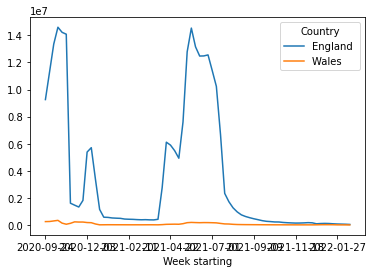

In [152]:
country_pivot.plot()